In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import mdtraj as md
import math
from sklearn import linear_model
from scipy.optimize import curve_fit
import seaborn as sns
import sys
# Personal database tool. Will be shared on Github
sys.path.append(r'C:\Users\small\PycharmProjects')
sys.path.append(r'C:\Users\small\PycharmProjects\simulationdatabase')
import simulationdatabase as sd

In [2]:
# Define the running path of the script
"""
path=''
if not path:
    path=os.getcwd()
os.chdir(path)
"""

"\npath=''\nif not path:\n    path=os.getcwd()\nos.chdir(path)\n"

In [3]:
# Schema

# Feature table
# Compatible with the Feature table generated by the simulationdatabase library
# Protein name, Datatype, MTFE, Result

# Entropy table
# Same style as the feature table
# Protein name, Distance, Angle, MTFE, Result

In [4]:
# PyPlot Setup
sns.set_theme(style="ticks", palette="pastel")
import matplotlib as mpl
plt.style.use(r'F:\DATA_F\JPCB_fig_publish\publish.mplstyple')
#plt.style.use(os.path.join(path,'publish.mplstyple'))

In [5]:
# Save figure
def save_to_svg(filename, root_path='F:\DATA_F\JPCB_fig_publish'):
    plt.savefig(os.path.join(root_path,filename))
#def save_to_svg(filename, root_path=os.paty.join(path,'JPCB_fig_publish')):
#    plt.savefig(os.path.join(root_path,filename))

## Load Data

In [6]:
target_dir=r'F:\DATA_F\Entropy_Force_raw_data'
os.chdir(target_dir)
protein_entry=pd.read_csv('Disprot_DP_simulation_stat.csv')
full_df=pd.read_csv('Disprot_DP_entropic_force.csv')
ref_df=pd.read_csv('Disprot_DP_ensemble_data.csv')

In [7]:
#GS_data
target_dir_gs=r'F:\DATA_F\Entropy_Force_raw_data'
os.chdir(target_dir_gs)
protein_entry_gs=pd.read_csv('GS_linker_simulation_stat.csv')
full_df_gs=pd.read_csv('GS_linker_entropic_force.csv')
ref_df_gs=pd.read_csv('GS_linker_ensemble_data.csv')

In [8]:
target_dir_NDK=r'F:\DATA_F\Entropy_Force_raw_data'
os.chdir(target_dir_NDK)
protein_entry_NDK=pd.read_csv('UGDH_simulation_stat.csv')
full_df_NDK=pd.read_csv('UGDH_entropic_force.csv')
ref_df_NDK=pd.read_csv('UGDH_ensemble_data.csv')

In [9]:
target_dir=r'F:\DATA_F\Entropy_Force_raw_data'
os.chdir(target_dir)
protein_entry_puma=pd.read_csv('PUMA_simulation_stat.csv')
full_df_puma=pd.read_csv('PUMA_entropic_force.csv')
ref_df_puma=pd.read_csv('PUMA_ensemble_data.csv')

## Database Statistics

In [10]:
re=ref_df[(ref_df['datatype']=='ee')&(ref_df['MTFE']==0)].dropna(axis=1).reset_index(drop=True)
re_gs=ref_df_gs[(ref_df_gs['datatype']=='ee')&(ref_df_gs['MTFE']==0)].dropna(axis=1).reset_index(drop=True)
features=ref_df[(ref_df['datatype']=='feature')][['Protein','length']].reset_index(drop=True)
features_gs=ref_df_gs[(ref_df_gs['datatype']=='feature')][['Protein','length']].reset_index(drop=True)
re_features=re.merge(features,how='inner')
re_features_gs=re_gs.merge(features_gs,how='inner').sort_values(by=['length'])

In [11]:
def fit_function(x,a,b):
    return (a*x**(-b))
X=re_features_gs['length'].to_numpy()
y=re_features_gs['Rs'].to_numpy()
popt,pcov=curve_fit(fit_function,X,y)
x_pred=re_features['length'].sort_values().to_numpy()
x_pred = np.insert(x_pred,[0],[8])
print(x_pred[0])
y_pred=fit_function(x_pred, *popt)
y_pred_34=fit_function(x_pred, popt[0],-0.33)
y_pred_58=fit_function(x_pred, popt[0], -0.59)
print('fitting parameters....errors')
print(popt,np.sqrt(np.diag(pcov)))

8.0
fitting parameters....errors
[ 0.54793342 -0.48113507] [0.06106822 0.02552272]


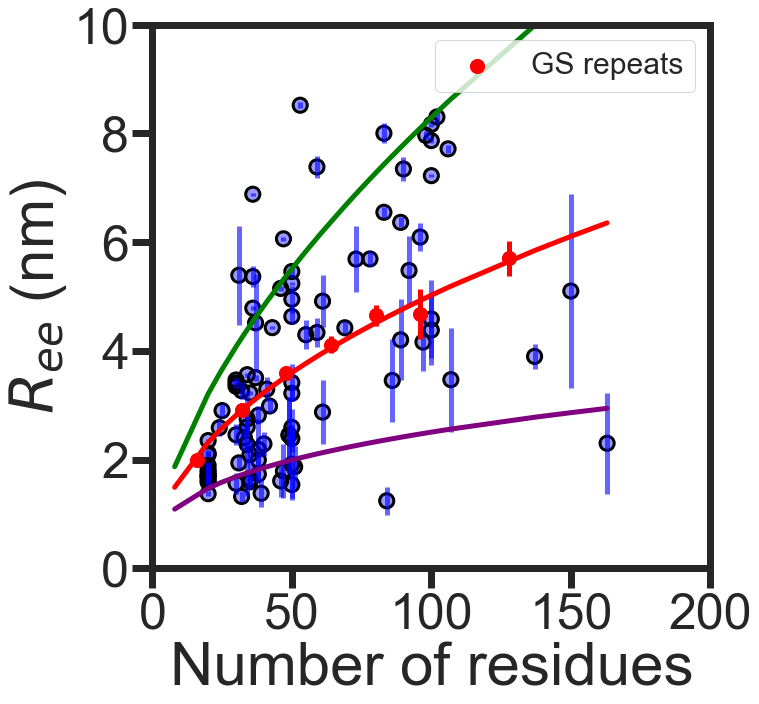

In [12]:
plt.scatter(re_features['length'], re_features['Rs'],s=200,c='blue',alpha=0.4)
plt.scatter(re_features['length'], re_features['Rs'],s=200,facecolors='none'
            ,edgecolors='black',linewidth=3)
plt.errorbar(re_features['length'], re_features['Rs'],yerr=re_features['Sd'],ls='None',c='blue',alpha=0.6)

plt.xlim(0,200)
plt.plot(x_pred, y_pred,color='red')
plt.plot(x_pred, y_pred_34, color='purple')
plt.plot(x_pred, y_pred_58, color='green')
plt.scatter(re_features_gs['length'], re_features_gs['Rs'],color='red',s=200,label='GS repeats',zorder=2)
plt.errorbar(re_features_gs['length'], re_features_gs['Rs'], yerr=re_features_gs['Sd'] ,color='red', ls='None',zorder=2)
plt.legend
plt.ylabel('$R_{ee}$ (nm)')
plt.xlabel('Number of residues')
plt.locator_params(axis='x',nbins=5)
plt.legend()
plt.ylim(0,10)
save_to_svg('Fig2B.svg')

In [13]:
heli=ref_df[(ref_df['datatype']=='helix')&(ref_df['MTFE']==0)].dropna(axis=1).reset_index(drop=True)
heli_gs=ref_df_gs[(ref_df_gs['datatype']=='helix')&(ref_df_gs['MTFE']==0)].dropna(axis=1).reset_index(drop=True)
features=ref_df[(ref_df['datatype']=='feature')][['Protein','length']].reset_index(drop=True)
features_gs=ref_df_gs[(ref_df_gs['datatype']=='feature')][['Protein','length']].reset_index(drop=True)
heli_features=heli.merge(features,how='inner')
heli_features_gs=heli_gs.merge(features_gs,how='inner').sort_values(by=['length'])

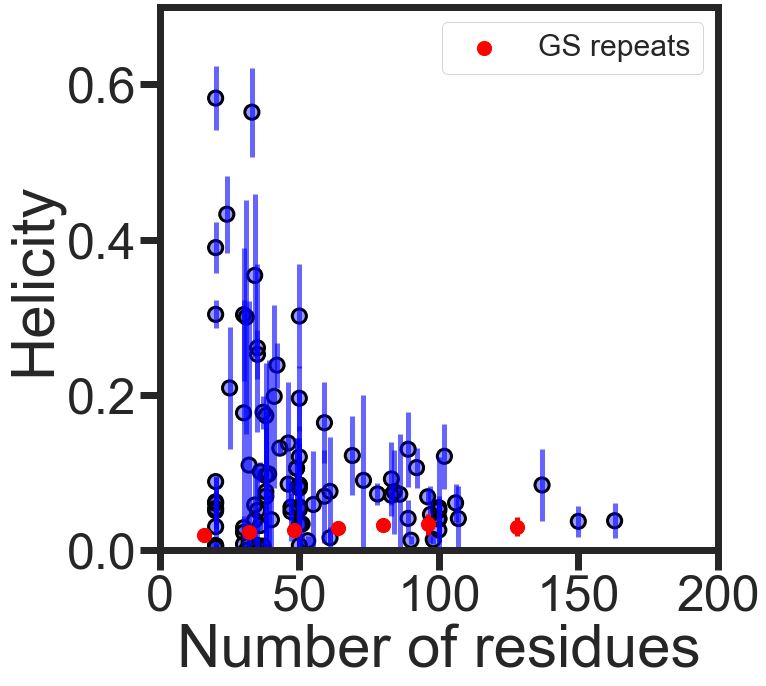

In [14]:
plt.scatter(heli_features['length'], heli_features['Rs'],s=200,c='blue',alpha=0.4)
plt.scatter(heli_features['length'], heli_features['Rs'],s=200,facecolors='none'
            ,edgecolors='black',linewidth=3)
plt.errorbar(heli_features['length'], heli_features['Rs'],yerr=heli_features['Sd'],ls='None',c='blue',alpha=0.6)
plt.scatter(heli_features_gs['length'], heli_features_gs['Rs'],color='red',s=200,label='GS repeats',zorder=2)
plt.errorbar(heli_features_gs['length'], heli_features_gs['Rs'], yerr=heli_features_gs['Sd'] ,color='red', ls='None',zorder=2)
plt.xlim(0,200)
plt.ylim(0,1)
#plt.plot(X, y_pred,color='red')
plt.ylabel('Helicity')
plt.xlabel('Number of residues')
plt.locator_params(axis='x',nbins=5)
plt.legend()
plt.ylim(0,0.7)
save_to_svg('Fig2C.svg')

## Define a function to plot heat map

In [15]:
def heatmap(target):
    heatmap=full_df[(full_df['Protein']==target)&(full_df['MTFE']==0)].reset_index(drop=True)
    mask=np.tril(np.ones_like(heatmap.pivot('angle', 'distance', 'Omega2/Omega1'),dtype=bool),k=-1)[:,::-1]
    print(mask.shape)
    heatmap['ln_Omega2/Omega1']=np.log(heatmap['Omega2/Omega1'])
    ax=sns.heatmap(heatmap.pivot('angle', 'distance', 'ln_Omega2/Omega1'),mask=mask, cmap="YlGnBu", cbar_kws={'label': 'ln $\Omega_T/\Omega_U$'}, vmin=-4, vmax=0)
    #ax.figure.axes[-1].yaxis.label.set_size(60)
    cbar = ax.collections[0].colorbar
    #cbar.ax.tick_params(labelsize=60)
    plt.ylabel('Angle $\\theta$ (degree)')
    plt.xlabel('Distance (nm)')

(3, 3)


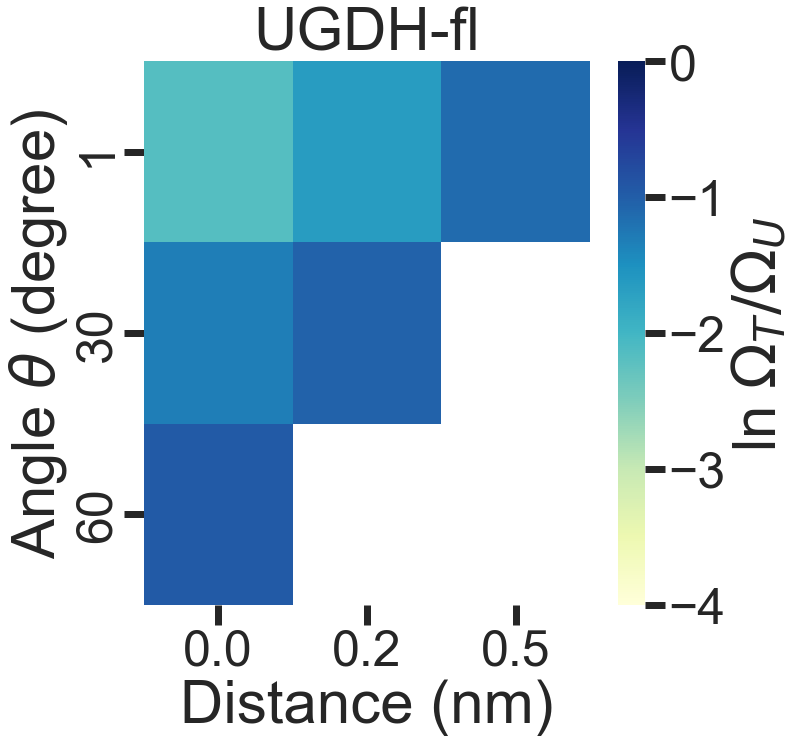

In [16]:
heatmap('fl')
plt.title('UGDH-fl')
save_to_svg('Fig3B.svg')

## Compare UGDH with the ideal polymer

In [17]:
def entropy_plot_average_UGDH(x_axis,x_column='Rs',xlim=(0.5,4)):
    entropy_this_cell=full_df[(full_df['MTFE']==0)]
    entropy_this_cell_gs=full_df_gs[(full_df_gs['MTFE']==0)]
    entropy_this_cell_NDK=full_df_NDK[(full_df_NDK['MTFE']==0)]
    subset=ref_df[ref_df['datatype']==x_axis].merge(entropy_this_cell,how='inner',on=['Protein','MTFE'])
    subset_gs=ref_df_gs[ref_df_gs['datatype']==x_axis].merge(entropy_this_cell_gs,how='inner',on=['Protein','MTFE'])
    subset_NDK=ref_df_NDK[ref_df_NDK['datatype']==x_axis].merge(entropy_this_cell_NDK,how='inner',on=['Protein','MTFE'])
    if x_axis=='feature':
        subset=ref_df[ref_df['datatype']==x_axis].merge(entropy_this_cell,how='inner',on=['Protein'])
        subset_gs=ref_df_gs[ref_df_gs['datatype']==x_axis].merge(entropy_this_cell_gs,how='inner',on=['Protein'])
        subset_NDK=ref_df_NDK[ref_df_NDK['datatype']==x_axis].merge(entropy_this_cell_NDK,how='inner',on=['Protein'])
    
    subset_NDK=subset_NDK.loc[~subset_NDK['Protein'].isin(['r1','r2'])]
    
    subset = subset.groupby(['Protein']).mean().sort_values(by=[x_column],ascending=True)
    subset_gs = subset_gs.groupby(['Protein']).mean().sort_values(by=[x_column],ascending=True)
    subset_NDK = subset_NDK.groupby(['Protein']).mean().sort_values(by=[x_column], ascending=True)
    x_predict=subset[x_column].to_numpy()
    x_predict=np.insert(x_predict,0,[8,10,12,14,16])
    
    def fit_function(x,a,b):
        return (a*x**(-b))
    def function_fitting(dataframe,x_name='Rs',y_name='Omega2/Omega1'):    
        x = dataframe[x_name].to_numpy()
        y = dataframe[y_name].to_numpy()
        popt,pcov=curve_fit(fit_function, x, y)
        y_predict = fit_function(x, *popt)
        return x, y, y_predict, popt
    
    x, y, y_predict_gs, popt=function_fitting(subset_gs, x_name=x_column)
    y_predict=fit_function(x_predict, *popt)
    
    subset['GS_fit']=y_predict[5:]
    plt.plot(x_predict,np.log(y_predict),'r-')
    plt.scatter(x=subset.loc['DP00060',x_column],y=np.log(subset.loc['DP00060','Omega2/Omega1']),s=800,color='purple',label='M.PvuII',edgecolor='black',linewidth=5)
    plt.scatter(x=subset.loc['DP00974',x_column],y=np.log(subset.loc['DP00974','Omega2/Omega1']),s=800,color='orange',label='MOR-1',edgecolor='black',linewidth=5)
    plt.scatter(x=subset_gs[x_column],y=np.log(subset_gs['Omega2/Omega1']),color='red',s=800, label='GS Repeats',zorder=2,edgecolor='black',linewidth=5)
    plt.scatter(x=subset_NDK[x_column],y=np.log(subset_NDK['Omega2/Omega1']),s=800,color='grey',label='UGDH',zorder=3,edgecolor='black',linewidth=5)
    plt.xlim(xlim)
    #plt.ylabel(f'ln $\Omega_T/\Omega_U$ ')
    plt.ylabel('$\Delta S/k$ ')
    plt.locator_params(axis='x',nbins=5)
    plt.legend()

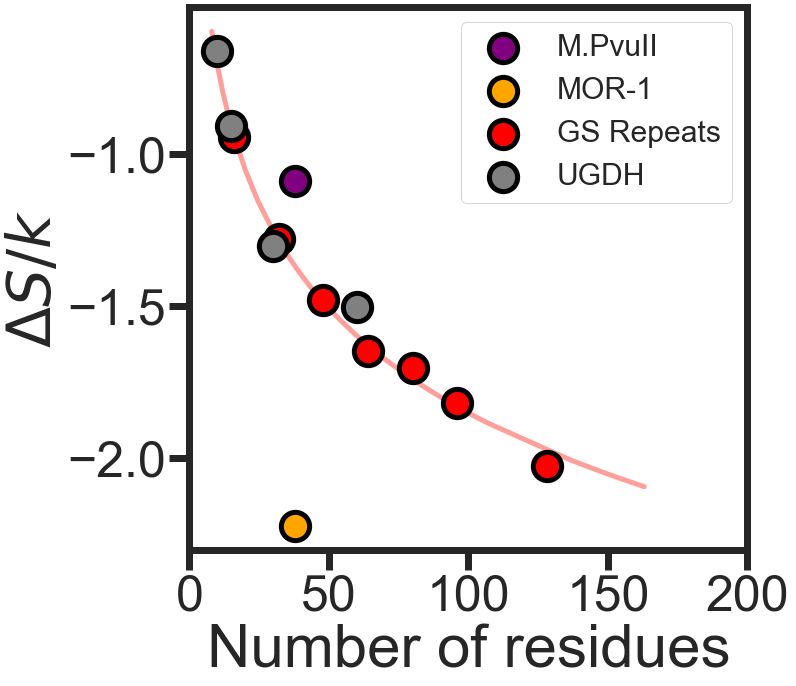

In [18]:
entropy_plot_average_UGDH('feature',x_column='length',xlim=(0, 200))
plt.xlabel('Number of residues')
save_to_svg('Fig3C.svg')

In [19]:
def entropy_bar_puma(x_axis,x_column='Rs'):
    entropy_this_cell=full_df_puma[(full_df_puma['MTFE']==0)]    
    subset=ref_df_puma[ref_df_puma['datatype']==x_axis].merge(entropy_this_cell,how='inner',on=['Protein','MTFE'])
    if x_axis=='feature':
        subset=ref_df_puma[ref_df_puma['datatype']==x_axis].merge(entropy_this_cell,how='inner',on=['Protein'])
    subset = subset.groupby(['Protein']).mean()
    subset.sort_values(by=[x_column],ascending=True,inplace=True)
    
    entropy_this_cell_gs=full_df_gs[(full_df_gs['MTFE']==0)]
    subset_gs=ref_df_gs[ref_df_gs['datatype']==x_axis].merge(entropy_this_cell_gs,how='inner',on=['Protein','MTFE'])
    if x_axis=='feature':
        subset_gs=ref_df_gs[ref_df_gs['datatype']==x_axis].merge(entropy_this_cell_gs,how='inner',on=['Protein'])
    subset_gs = subset_gs.groupby(['Protein']).mean()
    subset_gs.sort_values(by=[x_column],ascending=True,inplace=True)
    x_predict=subset[x_column].to_numpy()
    def fit_function(x,a,b):
        return (a*x**(-b))
    def function_fitting(dataframe,x_name='Rs',y_name='Omega2/Omega1'):    
        x = dataframe[x_name].to_numpy()
        y = dataframe[y_name].to_numpy()
        popt,pcov=curve_fit(fit_function, x, y)
        y_predict = fit_function(x, *popt)
        return x, y, y_predict, popt
    x, y, y_predict_gs, popt=function_fitting(subset_gs, x_name=x_column)
    y_predict=fit_function(x_predict, *popt)
    print(subset.loc['puma_wildfull','Omega2/Omega1'])
    subset['GS_fit']=y_predict
    subset['GS_bool']=(subset['Omega2/Omega1']>subset['GS_fit'])
    subset_larger=subset[subset['GS_bool']==True]
    subset_smaller=subset.loc[subset['GS_bool']==False]
    sns.histplot(data=subset,x=np.log(subset['Omega2/Omega1']))
    plt.axvline(x=np.log(subset.loc['puma_wildfull','Omega2/Omega1']), color='purple', ls='--', linewidth=5, label='WT PUMA')
    plt.axvline(x=np.log(y_predict[0]),color='red', ls='--',linewidth=5,label='GS repeats')
    #plt.xlabel(f'ln $\Omega_T/\Omega_U$ ')
    plt.xlabel('$\Delta S/k$')
    plt.ylabel(f'Counts')
    plt.legend()

0.16942859407196065


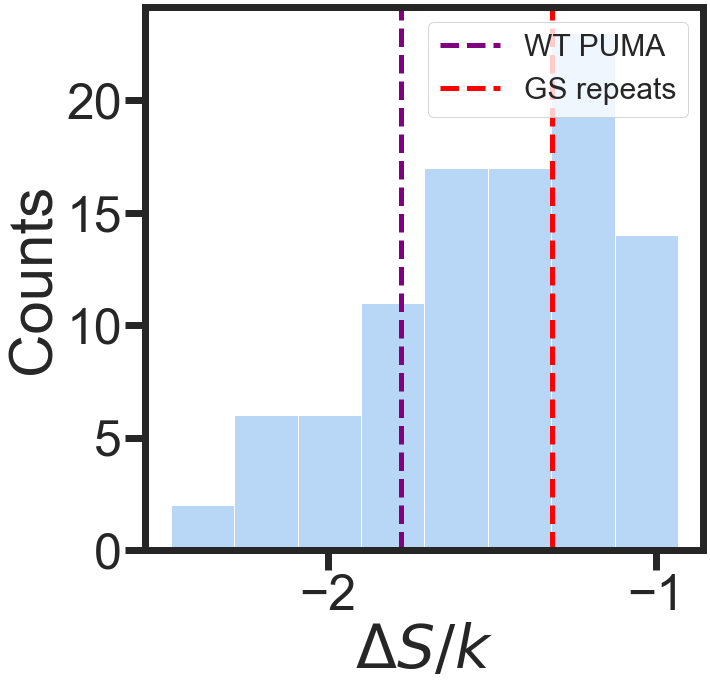

In [20]:
entropy_bar_puma('feature','length')
save_to_svg('Fig3D.svg')

# Average the heatmap to generate scatter plot

In [21]:
def entropy_plot_average(x_axis,x_column='Rs',xlim=(0.5,4)):
    entropy_this_cell=full_df[(full_df['MTFE']==0)]
    entropy_this_cell_gs=full_df_gs[(full_df_gs['MTFE']==0)]
    subset=ref_df[ref_df['datatype']==x_axis].merge(entropy_this_cell,how='inner',on=['Protein','MTFE'])
    subset_gs=ref_df_gs[ref_df_gs['datatype']==x_axis].merge(entropy_this_cell_gs,how='inner',on=['Protein','MTFE'])
    if x_axis=='feature':
        subset=ref_df[ref_df['datatype']==x_axis].merge(entropy_this_cell,how='inner',on=['Protein'])
        subset_gs=ref_df_gs[ref_df_gs['datatype']==x_axis].merge(entropy_this_cell_gs,how='inner',on=['Protein'])
    subset = subset.groupby(['Protein']).mean()
    subset_gs = subset_gs.groupby(['Protein']).mean()
    subset_gs.sort_values(by=[x_column],ascending=True,inplace=True)
    subset.sort_values(by=[x_column],ascending=True,inplace=True)
    x_predict=subset[x_column].to_numpy()
    
    def fit_function(x,a,b):
        return (a*x**(-b))
    def function_fitting(dataframe,x_name='Rs',y_name='Omega2/Omega1'):    
        x = dataframe[x_name].to_numpy()
        y = dataframe[y_name].to_numpy()
        popt,pcov=curve_fit(fit_function, x, y)
        y_predict = fit_function(x, *popt)
        return x, y, y_predict, popt
    
    x, y, y_predict_gs, popt=function_fitting(subset_gs, x_name=x_column)
    y_predict=fit_function(x_predict, *popt)
    
    subset['GS_fit']=y_predict
    subset['GS_bool']=(subset['Omega2/Omega1']>subset['GS_fit'])
    subset_larger=subset[subset['GS_bool']==True]
    subset_smaller=subset.loc[subset['GS_bool']==False]
    #print(subset.corr())
    plt.scatter(x=subset_larger[x_column],y=np.log(subset_larger['Omega2/Omega1']),s=200,color='green',label='Weaker force')
    plt.scatter(x=subset_smaller[x_column],y=np.log(subset_smaller['Omega2/Omega1']),s=200,color='blue',label='Stronger force')
    plt.scatter(x=subset_gs[x_column],y=np.log(subset_gs['Omega2/Omega1']),color='red',s=200, label='GS Repeats')
    plt.plot(x_predict,np.log(y_predict),'r-')
    plt.xlim(xlim)
    #plt.ylabel(f'ln $\Omega_T/\Omega_U$ ')
    plt.ylabel('$\Delta S/k$ ')
    plt.locator_params(axis='x',nbins=5)
    plt.legend()
    return subset_larger.index.to_series().reset_index(drop=True), subset_smaller.index.to_series().reset_index(drop=True)

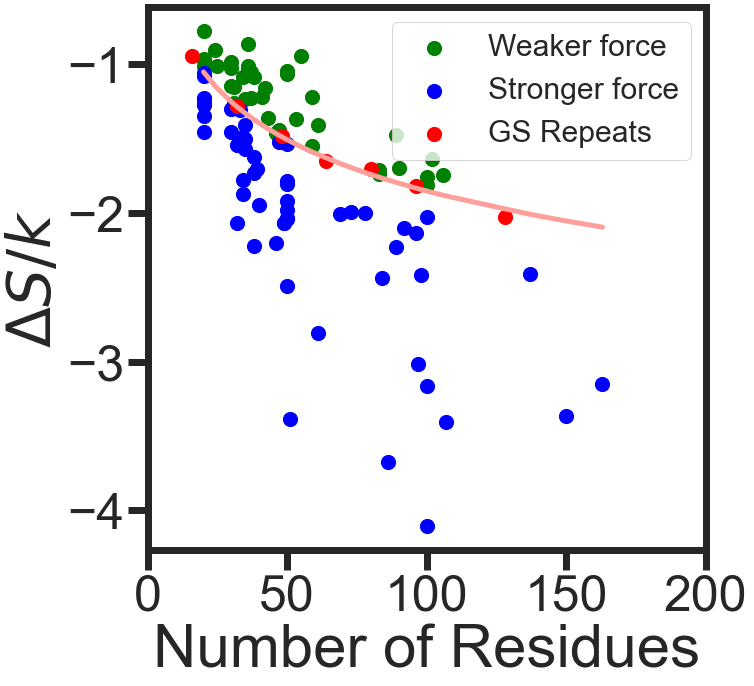

In [22]:
larger,smaller=entropy_plot_average('feature',x_column='length',xlim=(0, 200))
plt.xlabel('Number of Residues')
save_to_svg('Fig4A.svg')

## Normalize End-to-end distance

In [23]:
ref_df.loc[ref_df['datatype']=='feature','GS_Chi']=0.55*ref_df.loc[ref_df['datatype']=='feature','length']**0.48
a=ref_df.loc[ref_df['datatype']=='feature']
b=ref_df.loc[(ref_df['datatype']=='ee') & (ref_df['MTFE']==0)]
c=b.merge(a,on='Protein', how='inner')
c['Chi']=(c['Rs_x']/c['GS_Chi_y'])-1

In [24]:
ref_df_gs.loc[ref_df_gs['datatype']=='feature','GS_Chi']=0.55*ref_df_gs.loc[ref_df_gs['datatype']=='feature','length']**0.48
a_gs=ref_df_gs.loc[ref_df_gs['datatype']=='feature']
b_gs=ref_df_gs.loc[(ref_df_gs['datatype']=='ee') & (ref_df_gs['MTFE']==0)]
c_gs=b_gs.merge(a_gs,on='Protein', how='inner')
c_gs['Chi']=(c_gs['Rs_x']/c_gs['GS_Chi_y'])-1

In [25]:
def entropy_plot_chi_average(x_column='Chi',xlim=(-1.1,1.1)):
    entropy_this_cell=full_df[(full_df['MTFE']==0)]
    subset=c.merge(entropy_this_cell, on='Protein', how='inner')
    entropy_this_cell_gs=full_df_gs[(full_df_gs['MTFE']==0)]
    subset_gs=c_gs.merge(entropy_this_cell_gs,how='inner',on='Protein')
    subset_gs=subset_gs.groupby(['Protein']).mean()
    print(subset_gs)
    subset_gs.sort_values(by=[x_column],ascending=True,inplace=True)
    subset_larger=subset.merge(larger,how='inner',on='Protein')
    subset_smaller=subset.merge(smaller,how='inner',on='Protein')
    subset_larger = subset_larger.groupby(['Protein']).mean()
    subset_smaller = subset_smaller.groupby(['Protein']).mean()
    subset.sort_values(by=[x_column],ascending=True,inplace=True)
    plt.axvline(x=0,color='red', ls='--',zorder=2)
    plt.scatter(x=subset_larger[x_column],y=np.log(subset_larger['Omega2/Omega1']),s=200,color='green',label='Weaker force')
    plt.scatter(x=subset_smaller[x_column],y=np.log(subset_smaller['Omega2/Omega1']),s=200,color='blue',label='Stronger force')
    plt.scatter(x=subset_gs[x_column],y=np.log(subset_gs['Omega2/Omega1']),s=200,color='red',label='GS Repeats')
    plt.xlim(xlim)
    #plt.ylabel(f'ln $\Omega_T/\Omega_U$')
    plt.ylabel('$\Delta S/k$ ')
    plt.locator_params(axis='x', nbins=5)

         MTFE_x      Rs_x      Sd_x  Frame_x  length_x  kappa_x  FCR_x  \
Protein                                                                  
GS16        0.0  2.914744  0.025926  28000.0       NaN      NaN    NaN   
GS24        0.0  3.597450  0.042596  28000.0       NaN      NaN    NaN   
GS32        0.0  4.114931  0.162544  28000.0       NaN      NaN    NaN   
GS40        0.0  4.650516  0.193890  28040.0       NaN      NaN    NaN   
GS48        0.0  4.682540  0.456141  28045.0       NaN      NaN    NaN   
GS64        0.0  5.699591  0.314515  28000.0       NaN      NaN    NaN   
GS8         0.0  1.985934  0.006048  28000.0       NaN      NaN    NaN   

         NCPR_x  Hydrophobicity_x  Expanding_x  ...  Hydrophobicity_y  \
Protein                                         ...                     
GS16        NaN               NaN          NaN  ...               3.9   
GS24        NaN               NaN          NaN  ...               3.9   
GS32        NaN               NaN        

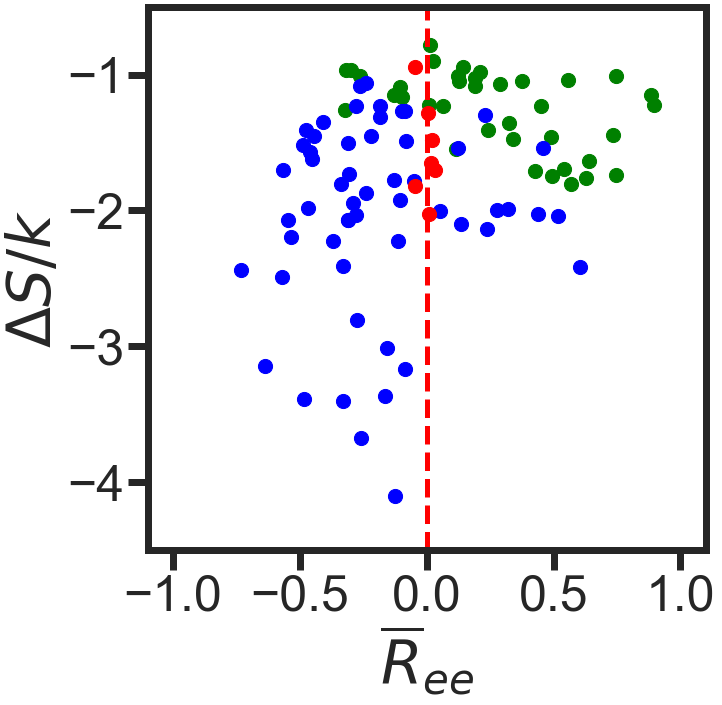

In [26]:
entropy_plot_chi_average()
plt.xlabel(r'$\overline{R}_{ee}$')
plt.ylim(-4.5,-0.5)
save_to_svg('Fig4B.svg')

In [27]:
##This one return the dataset of GS linker
def entropy_plot_asphericity(x_column,xlim=(-1.1,1.1)):
    ensemble=ref_df.loc[(ref_df['datatype']=='sphericity') & (ref_df['MTFE']==0)].dropna(axis=1).merge(c[['Protein','Chi']],on='Protein', how='inner')
    ensemble_gs=ref_df_gs.loc[(ref_df_gs['datatype']=='sphericity') & (ref_df_gs['MTFE']==0)].dropna(axis=1).merge(c_gs[['Protein','Chi']],on='Protein', how='inner')
    entropy_this_cell=full_df[(full_df['MTFE']==0)]
    subset=ensemble.merge(entropy_this_cell, on='Protein', how='inner')
    entropy_this_cell_gs=full_df_gs[(full_df_gs['MTFE']==0)]
    subset_gs=ensemble_gs.merge(entropy_this_cell_gs,how='inner',on='Protein')
    subset_gs=subset_gs.groupby(['Protein']).mean()
    subset_gs.sort_values(by=[x_column],ascending=True,inplace=True)
    subset_larger=subset.merge(larger,how='inner',on='Protein')
    subset_smaller=subset.merge(smaller,how='inner',on='Protein')
    subset_larger = subset_larger.groupby(['Protein']).mean()
    subset_smaller = subset_smaller.groupby(['Protein']).mean()
    subset.sort_values(by=[x_column],ascending=True,inplace=True)
    plt.scatter(x=subset_larger[x_column],y=np.log(subset_larger['Omega2/Omega1']),s=200,color='green',label='Weaker force')
    plt.scatter(x=subset_smaller[x_column],y=np.log(subset_smaller['Omega2/Omega1']),s=200,color='blue',label='Stronger force')
    plt.scatter(x=subset_gs[x_column],y=np.log(subset_gs['Omega2/Omega1']),s=200,color='red',label='GS Repeats')
    plt.xlim(xlim)
    #plt.ylabel(f'ln $\Omega_T/\Omega_U$')
    plt.ylabel('$\Delta S/k$')
    plt.locator_params(axis='x', nbins=5)
    return subset_gs

[0.39108168]


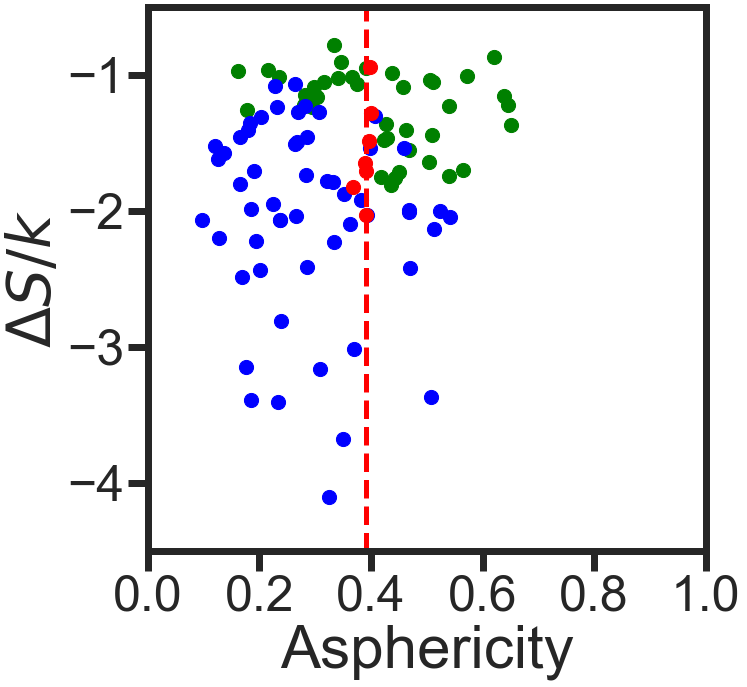

In [28]:
subset_gs=entropy_plot_asphericity(x_column='Rs',xlim=(0,1))

def fit_function(x,a):
    return (0.000000001*x + a)
    
x = subset_gs['Omega2/Omega1'].to_numpy()
y = subset_gs['Rs'].to_numpy()
popt,pcov=curve_fit(fit_function, x, y)
print(popt)
    
plt.axvline(x=popt[0],color='red', ls='--',zorder=2)
plt.xlabel('Asphericity')
plt.ylim(-4.5,-0.5)
save_to_svg('Fig4C.svg')

## Ensemble change with solution condition UGDH

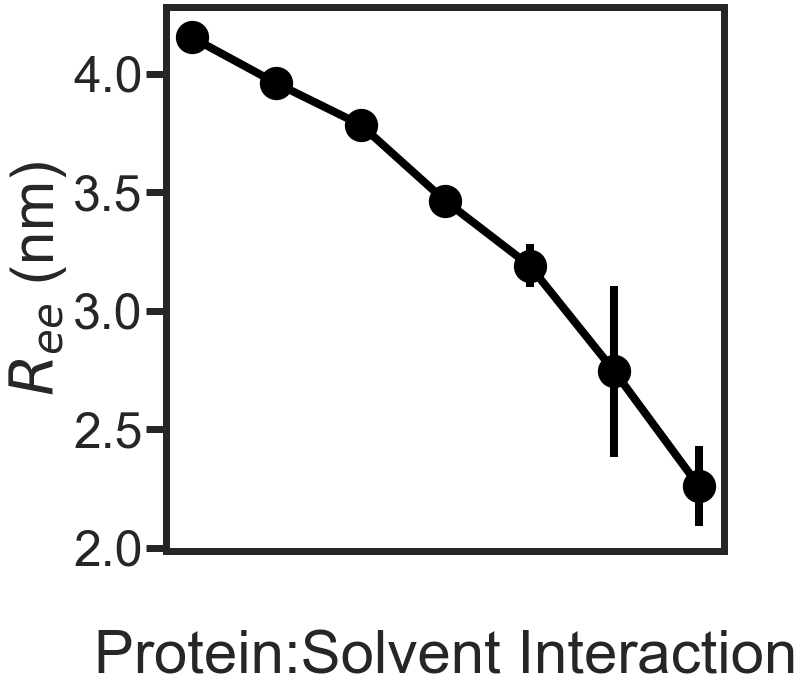

In [29]:
so_plot=ref_df[(ref_df['Protein']=='fl') & (ref_df['datatype']=='ee') ].sort_values(by=['MTFE'])
plt.errorbar(x=so_plot['MTFE'], y=so_plot['Rs'], yerr=so_plot['Sd'],linewidth=8,marker='.',ms=30, color='black')
plt.scatter(x=so_plot['MTFE'],y=so_plot['Rs'],color='black',s=800,edgecolor='black',linewidth=5,zorder=3)
plt.ylabel('$R_{ee}$ (nm)')
plt.xlabel('Protein:Solvent Interaction')
plt.locator_params(axis='y', nbins=5)
ax=plt.gca()
ax.set_xticks([])
ax.invert_xaxis()
ax.xaxis.labelpad = 80
save_to_svg('Fig5A.svg')

## Entropic force change with the solution condition change

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

DP00055 126   -2.672317
Name: normalized_Omega2/Omega1, dtype: float64
DP00949 427   -2.117826
Name: normalized_Omega2/Omega1, dtype: float64


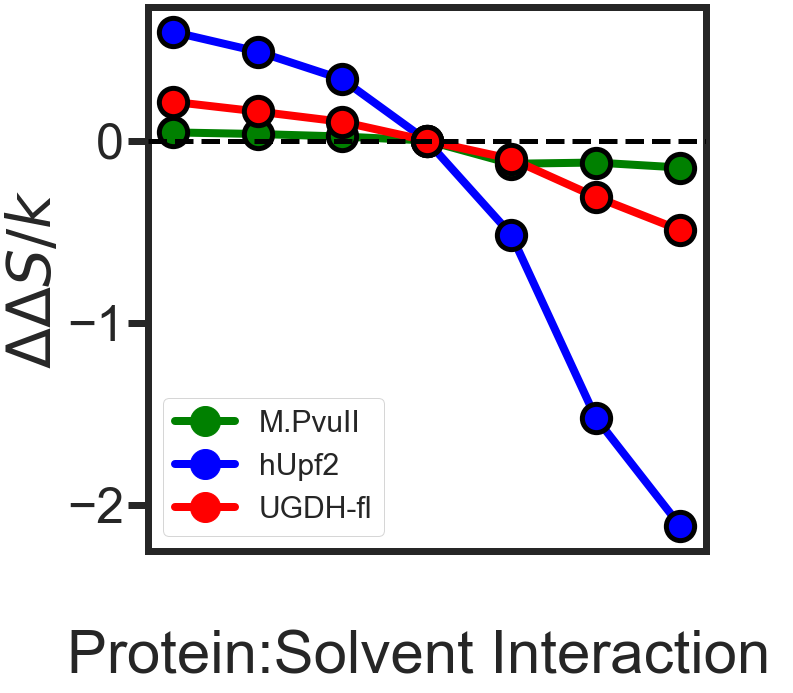

In [30]:
group_test=full_df[(full_df['MTFE'] != 0.5) & (full_df['MTFE'] != -0.5) ].groupby(['Protein','MTFE'])
group_test_df=group_test.mean().reset_index().drop(columns=['distance','angle','Frame'])
grouped=group_test_df.groupby(['Protein'])
target_list=['fl','DP00060','DP00949']
color_list=['red','green','blue']
label_list=['UGDH-fl','M.PvuII','hUpf2']
for key in grouped.groups.keys():
    plot_data=grouped.get_group(key).sort_values(by=['MTFE'])
    plot_data['normalized_Omega2/Omega1']=np.log(plot_data['Omega2/Omega1']/plot_data[plot_data['MTFE']==0.0]['Omega2/Omega1'].values)
    if plot_data[plot_data['MTFE']==-3.0]['normalized_Omega2/Omega1'].values<-2:
        print(key,plot_data[plot_data['MTFE']==-3.0]['normalized_Omega2/Omega1'])
    if key in target_list:
        color=color_list[target_list.index(key)]
        label=label_list[target_list.index(key)]
        plt.plot(plot_data['MTFE'],plot_data['normalized_Omega2/Omega1'],'-o',label=label,color=color,linewidth=8,ms=30,zorder=2)
        plt.scatter(x=plot_data['MTFE'],y=plot_data['normalized_Omega2/Omega1'],color=color,s=800,edgecolor='black',linewidth=5,zorder=3)
    else:
        color='grey'
    #plt.ylabel(f'$\Delta$ln($\Omega_T/\Omega_U$)')
    plt.ylabel('$\Delta \Delta S/k$')
    plt.xlabel('Protein:Solvent Interaction ')
    plt.legend(loc=3)
    plt.locator_params(axis='y', nbins=5)
plt.axhline(0,linestyle='--',zorder=4,color='black')
ax=plt.gca()
ax.invert_xaxis()
ax.set_xticks([])
ax.xaxis.labelpad = 80
save_to_svg('Fig5C.svg')

## Entropic force change for every IDR

In [31]:
list_all=[]
for key in grouped.groups.keys():
    plot_data=grouped.get_group(key).sort_values(by=['MTFE'])
    plot_data['normalized_Omega2/Omega1']=np.log(plot_data['Omega2/Omega1']/plot_data[plot_data['MTFE']==0.0]['Omega2/Omega1'].values)
    list_all.append(plot_data)
df_all=pd.concat(list_all)

In [32]:
order=df_all['MTFE'].unique()
print(order)
df_median=df_all.groupby('MTFE').median().sort_index(ascending=True)
df_median

[-3. -2. -1.  0.  1.  2.  3.]


,Omega2/Omega1,normalized_Omega2/Omega1
MTFE,,
-3.0,0.130501,-0.277162
-2.0,0.162254,-0.167271
-1.0,0.189799,-0.077799
0.0,0.214541,0.000000
1.0,0.234088,0.051923
2.0,0.256963,0.098714
3.0,0.264503,0.136245


[ 3.  2.  1.  0. -1. -2. -3.]


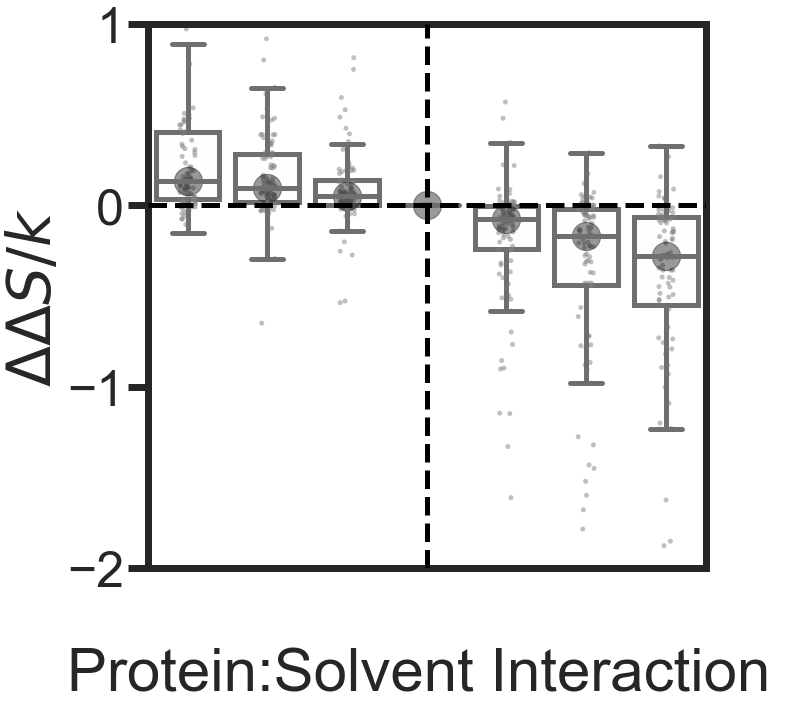

In [33]:
df_all=df_all.sort_values(by=['MTFE'],ascending=False)
order=df_all['MTFE'].unique()
print(order)
ax=sns.boxplot(y='normalized_Omega2/Omega1',x='MTFE', data=df_all, showfliers = False,zorder=3)
ax2=sns.stripplot(y='normalized_Omega2/Omega1',x='MTFE', data=df_all,color='grey',alpha=0.5,zorder=1,s=5)
ax3=plt.scatter((df_median.index)+3,df_median['normalized_Omega2/Omega1'],s=800,zorder=1,color='black',alpha=0.4)
ax.invert_xaxis()
for patch in ax.patches:
    fc = patch.get_facecolor()
    patch.set_facecolor(mpl.colors.to_rgba(fc,0.01))
ax2.set_xticks([])
ax2.xaxis.labelpad = 80
#plt.ylabel(f'$\Delta$ln($\Omega_T/\Omega_U$)')
plt.ylabel('$\Delta \Delta S/k$ ')
plt.xlabel('Protein:Solvent Interaction ')
plt.ylim(-2,1)
plt.axvline(x=3, color='black', ls='--',linewidth=5,zorder=4)
plt.axhline(y=0, color='black', ls='--',linewidth=5,zorder=4)
save_to_svg('Fig5B.svg')

## GS repeats  homopolymer scaling law 

In [34]:
gs_buffer=ref_df_gs[(ref_df_gs['datatype']=='ee') & (ref_df_gs['MTFE']==0)].dropna(axis=1).sort_values(by=['Rs'])
gs_buffer=gs_buffer.merge(ref_df_gs[ref_df_gs['datatype']=='feature'].dropna(axis=1),on='Protein')
gs_buffer

,Protein,datatype_x,MTFE,Rs,Sd,Frame,datatype_y,Sequence,length,kappa,FCR,NCPR,Hydrophobicity,Expanding,delta,GS_Chi
0,GS8,ee,0.0,1.985934,0.006048,28000.0,feature,GSGSGSGSGSGSGSGS,16.0,-1.0,0.0,0.0,3.9,0.0,0.0,2.081327
1,GS16,ee,0.0,2.914744,0.025926,28000.0,feature,GSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGS,32.0,-1.0,0.0,0.0,3.9,0.0,0.0,2.902917
2,GS24,ee,0.0,3.597450,0.042596,28000.0,feature,GSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGS,48.0,-1.0,0.0,0.0,3.9,0.0,0.0,3.526619
3,GS32,ee,0.0,4.114931,0.162544,28000.0,feature,GSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGS...,64.0,-1.0,0.0,0.0,3.9,0.0,0.0,4.048826
4,GS40,ee,0.0,4.650516,0.193890,28040.0,feature,GSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGS...,80.0,-1.0,0.0,0.0,3.9,0.0,0.0,4.506568
5,GS48,ee,0.0,4.682540,0.456141,28045.0,feature,GSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGS...,96.0,-1.0,0.0,0.0,3.9,0.0,0.0,4.918729
6,GS64,ee,0.0,5.699591,0.314515,28000.0,feature,GSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGSGS...,128.0,-1.0,0.0,0.0,3.9,0.0,0.0,5.647074


In [35]:
def fit_function(x,a,b):
    return (a*x**(-b)) 
X=gs_buffer['length'].to_numpy()
y=gs_buffer['Rs'].to_numpy()
popt,pcov=curve_fit(fit_function,X,y)
y_pred=fit_function(X, *popt)
print(popt)

[ 0.54793342 -0.48113507]


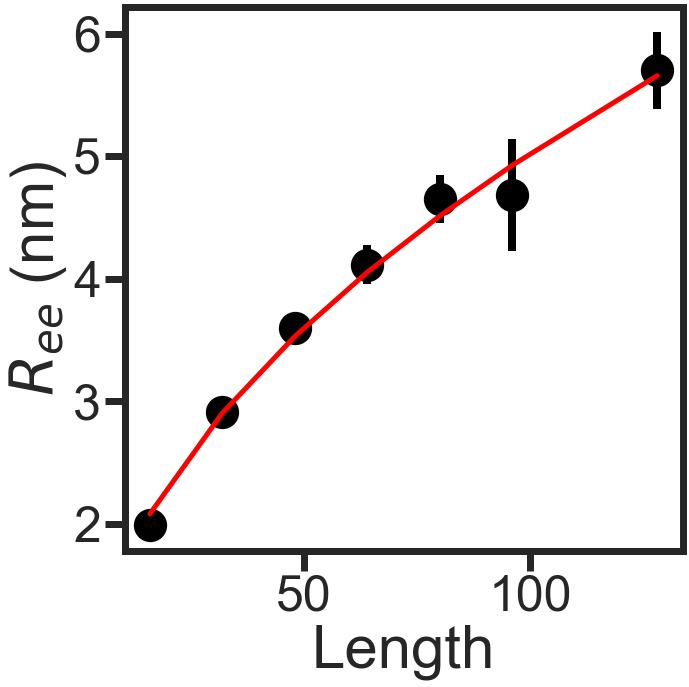

In [36]:
plt.ylabel('$R_{ee}$ (nm)')
plt.xlabel('Length')
plt.scatter(x=gs_buffer['length'], y=gs_buffer['Rs'], s=800, color='black',linewidth=5)
plt.errorbar(x=gs_buffer['length'], y=gs_buffer['Rs'], yerr=gs_buffer['Sd'],linewidth=8,ls='',ms=30, color='black')
plt.plot(X, y_pred,color='red')
#plt.title('$R_{ee}=0.55N^{0.48}$')
save_to_svg('FigS1.svg')

## Average GS Asphericity

Average 0.39
Standard Deviation 0.01


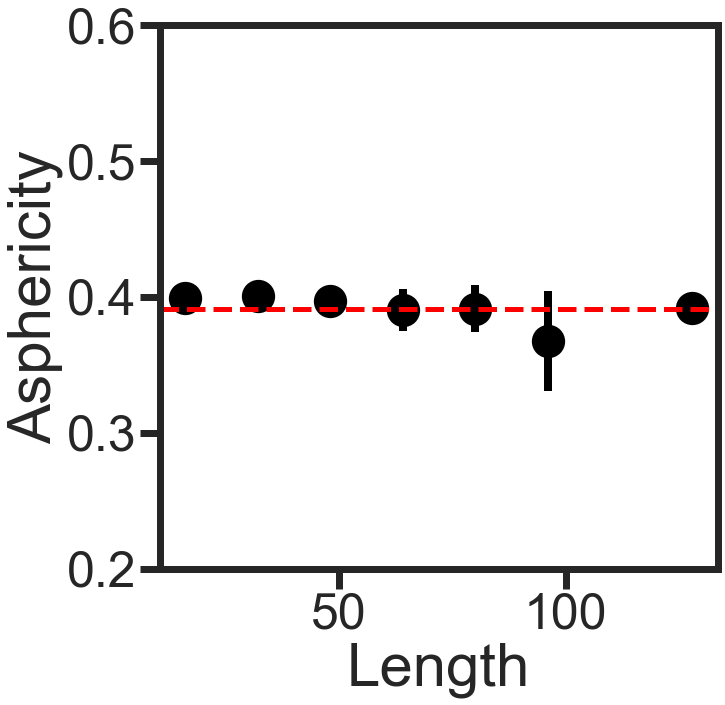

In [37]:
subset_gs=subset_gs.reset_index()
subset_gs['length']=subset_gs['Protein'].str.extract('(\d+)').astype(int)*2
subset_gs.sort_values(by=['length'],inplace=True)
plt.scatter(x='length',y='Rs',data=subset_gs, s=800, color='black',linewidth=5)
plt.errorbar(x='length',y='Rs',yerr='Sd',data=subset_gs,linewidth=8,ls='',ms=30,color='black')
plt.axhline(y=subset_gs.describe().loc['mean','Rs'],color='red',linestyle='--')
print('Average {:.2f}'.format(subset_gs.describe().loc['mean','Rs']))
print('Standard Deviation {:.2f}'.format(subset_gs.describe().loc['std','Rs']))
plt.ylim(0.2,0.6)
plt.ylabel('Asphericity')
plt.xlabel('Length')
save_to_svg('FigS2.svg')

In [38]:
subset_gs.describe()

,MTFE_x,Rs,Sd,Frame_x,Chi,distance,angle,MTFE_y,Omega2/Omega1,Frame_y,length
count,7.0,7.000000,7.000000,7.000000,7.000000,7.00,7.0,7.0,7.000000,7.000000,7.000000
mean,0.0,0.391082,0.012609,28012.142857,-0.001732,0.15,20.5,0.0,0.223269,28012.142857,66.285714
std,0.0,0.011093,0.012186,20.788046,0.032090,0.00,0.0,0.0,0.086962,20.788046,38.564726
min,0.0,0.367636,0.001646,28000.000000,-0.048018,0.15,20.5,0.0,0.131623,28000.000000,16.000000
25%,0.0,0.390840,0.004555,28000.000000,-0.020879,0.15,20.5,0.0,0.172046,28000.000000,40.000000
50%,0.0,0.391707,0.007943,28000.000000,0.009300,0.15,20.5,0.0,0.192498,28000.000000,64.000000
75%,0.0,0.398060,0.016331,28020.000000,0.018206,0.15,20.5,0.0,0.252685,28020.000000,88.000000
max,0.0,0.400428,0.036902,28045.000000,0.031942,0.15,20.5,0.0,0.389297,28045.000000,128.000000


## End-to-end distance change with the solution condition change

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

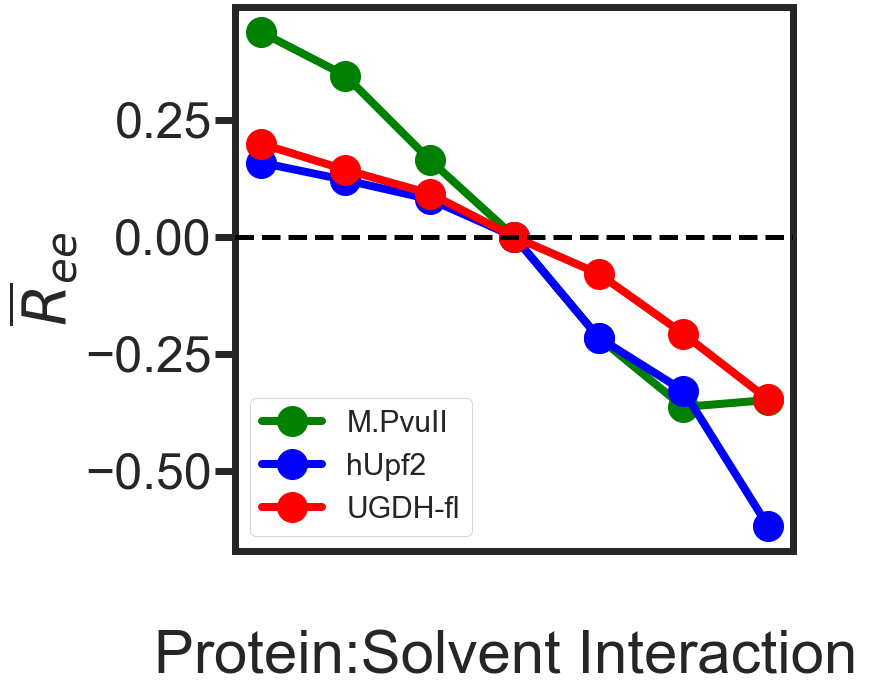

In [39]:
grouped_ref=ref_df[(ref_df['MTFE'] != 0.5) & (ref_df['MTFE'] != -0.5) & (ref_df['datatype'] == 'ee')].groupby(['Protein'])
target_list=['fl','DP00060','DP00949']
color_list=['red','green','blue']
label_list=['UGDH-fl','M.PvuII','hUpf2']
for key in grouped_ref.groups.keys():
    plot_data=grouped_ref.get_group(key).sort_values(by=['MTFE'])
    plot_data['normalized_Rs']=plot_data['Rs']/plot_data[plot_data['MTFE']==0.0]['Rs'].values-1
    if plot_data[plot_data['MTFE']==-3.0]['normalized_Rs'].values<-2:
        print(key,plot_data[plot_data['MTFE']==-3.0]['normalized_Rs'])
    if key in target_list:
        color=color_list[target_list.index(key)]
        label=label_list[target_list.index(key)]
        plt.plot(plot_data['MTFE'],plot_data['normalized_Rs'],'-o',label=label,color=color,linewidth=8,ms=30,zorder=3)
    else:
        color='grey'
        #plt.plot(plot_data['MTFE'],plot_data['normalized_Omega2/Omega1'],'-',color=color, linewidth=2, alpha=0.7)
    #plt.ylim(-0.5,1)
    plt.ylabel(r'$\overline{R}_{ee}$')
    plt.xlabel('Protein:Solvent Interaction ')
    plt.legend(loc=3)
    plt.locator_params(axis='y', nbins=5)
plt.axhline(0,linestyle='--',zorder=4,color='black')
ax=plt.gca()
ax.invert_xaxis()
ax.set_xticks([])
ax.xaxis.labelpad = 80
save_to_svg('FigS3.svg')
## End-to-end distance change with the solution condition change